## 1. Understanding color models and drawing figures on images ##

## LEARNING FROM THE BASICS ##

In [4]:
import matplotlib.pyplot as plt

In [5]:
import cv2

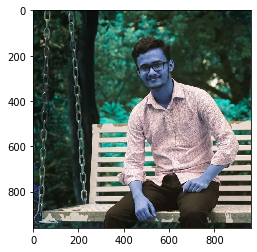

In [8]:
img = cv2.imread('mazhar.jpg')
plt.imshow(img)

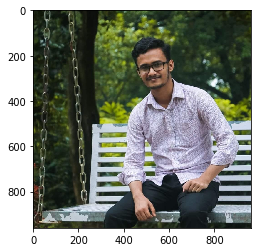

In [9]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

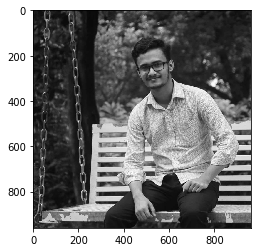

In [12]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap = 'gray')

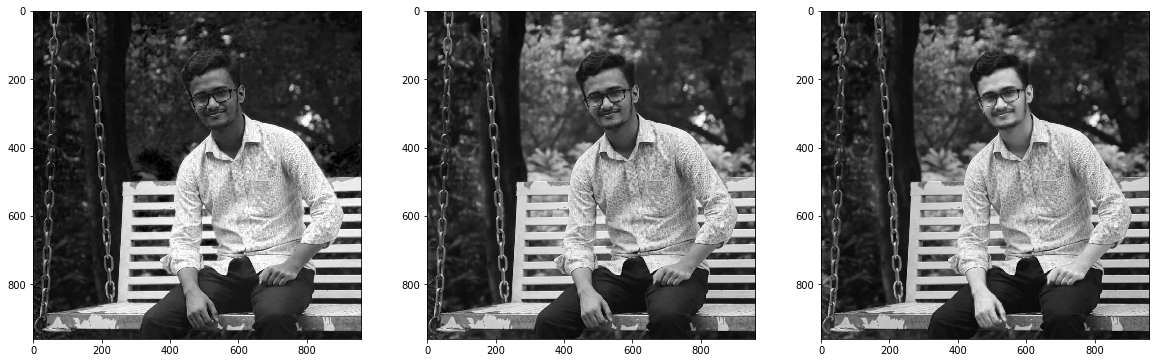

In [20]:
fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 20) )

for i in range (0, 3):
    ax = axs[i]
    ax.imshow(img[:,:,i], cmap = 'gray')
plt.show()

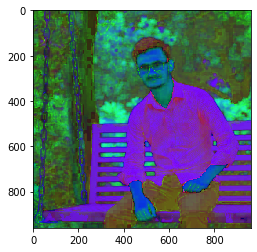

In [23]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
plt.imshow(img_hsv)

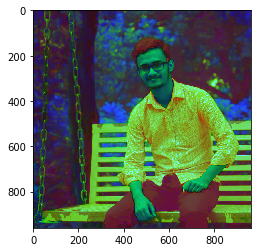

In [24]:
img_hls = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)
plt.imshow(img_hls)

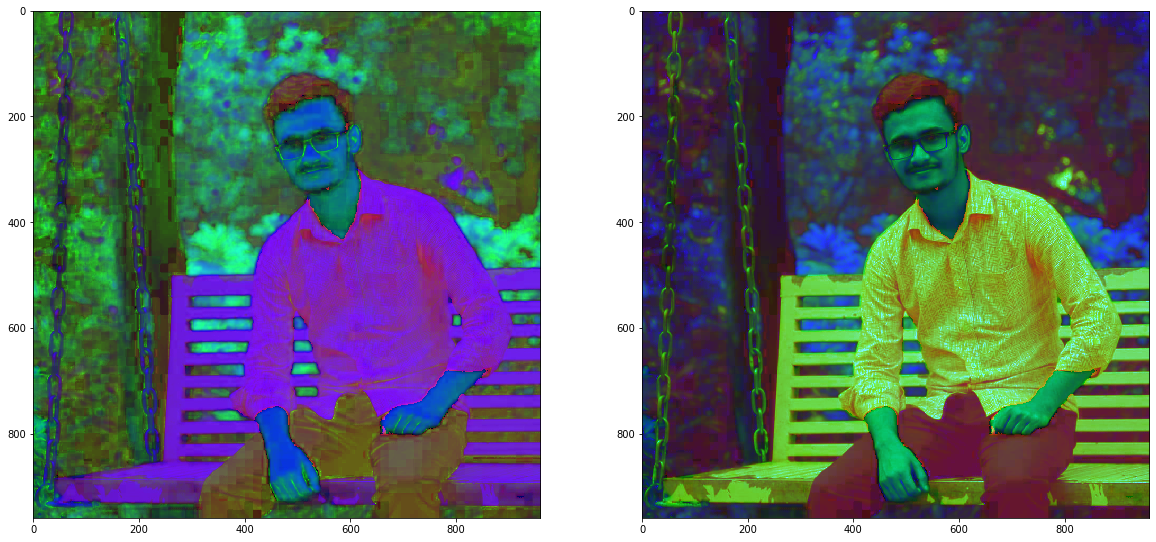

In [28]:
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
img_hls = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)

fig, (ph1, ph2) = plt.subplots(nrows= 1, ncols = 2, figsize = (20, 20))
ph1.imshow(img_hsv)
ph2.imshow(img_hls)
plt.show()

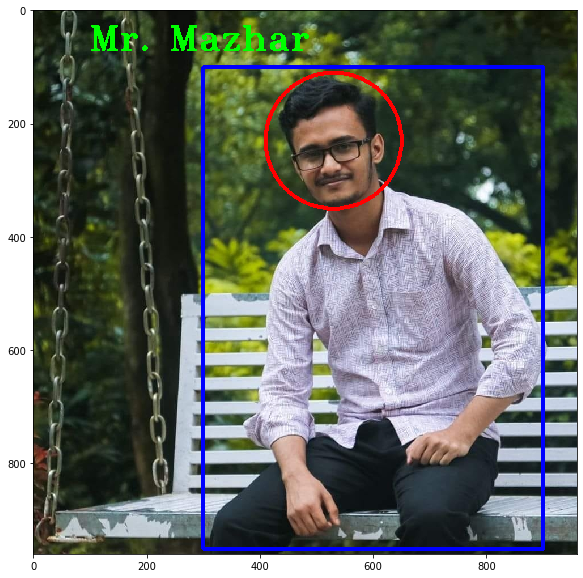

In [73]:
im_c = img_rgb.copy()
new = cv2.rectangle(im_c, pt1 = (900, 100), pt2 = (300, 950), color = (0, 0 , 255), thickness = 5), 
cv2.circle(im_c, center = (530, 230), radius = 120, color = (255, 0 , 0), thickness = 5),
cv2.putText(im_c, text = "Mr. Mazhar", org = (100, 70), color = (0, 255, 0), fontScale = 2, fontFace = cv2.FONT_HERSHEY_TRIPLEX, thickness = 3)
fig, new = plt.subplots(nrows = 1, ncols = 1, figsize = (10, 10))
plt.imshow(im_c)

## More than image - COPY ##

In [6]:
# Step 1. Define callback function
map_img  = cv2.imread('map.jpg')

def draw_circle(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
            cv2.circle(map_img, center = (x, y), radius = 5, color = (87, 184, 237), thickness = -1)
    elif event == cv2.EVENT_RBUTTONDOWN:        
            cv2.circle(map_img, center = (x, y), radius = 10, color = (87, 184, 237), thickness = 1)

In [7]:
# Step 2. Call the window
cv2.namedWindow(winname = 'my_drawing')
cv2.setMouseCallback('my_drawing', draw_circle)

In [8]:
# Step 3. Executi|on
while True:
    cv2.imshow('my_drawing',map_img)
    if cv2.waitKey(10) & 0xFF == 27:
        break
cv2.destroyAllWindows()

## A new program - COPY ##

In [2]:
import cv2
import numpy as np

# Step 1. Define callback function
drawing = False
ix = -1
iy = -1

def draw_rectangle(event, x, y, flags, params):

    global ix, iy, drawing

    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
        ix, iy = x, y
        
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing == True:
            cv2.rectangle(img, pt1 = (ix, iy), pt2 = (x, y), 
                          color = (87, 184, 237), thickness = -1)
            
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False
        cv2.rectangle(img, pt1 = (ix, iy), pt2 = (x, y), 
                      color = (87, 184, 237), thickness = -1)
        
    
# Step 2. Call the window
img = cv2.imread('map.jpg')

cv2.namedWindow(winname = 'my_drawing')
cv2.setMouseCallback('my_drawing', draw_rectangle)


# Step 3. Execution 
while True: 
    cv2.imshow('my_drawing', img)
    if cv2.waitKey(10) & 0xFF == 27:
        break

cv2.destroyAllWindows()

## 2. The basics of image processing with filtering

### Blurring

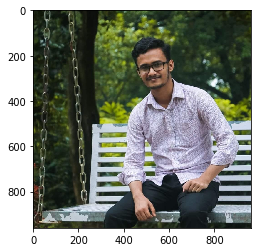

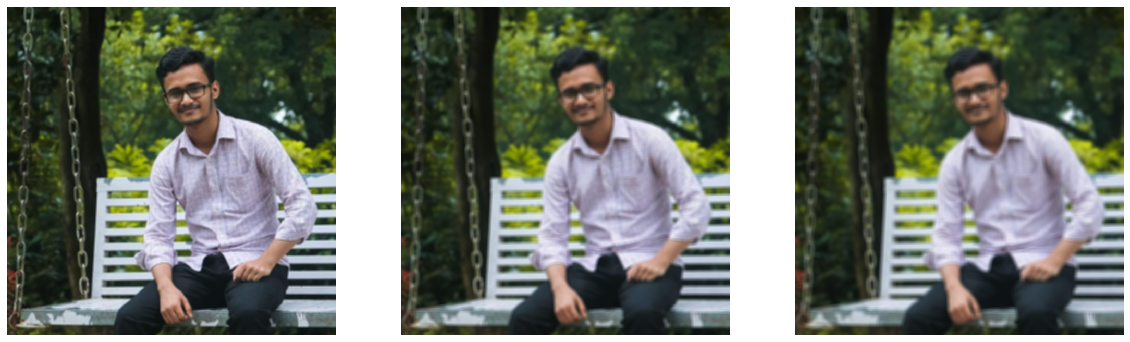

In [11]:
import cv2 
import matplotlib.pyplot as plt

img = cv2.imread('mazhar.jpg')
img_rbg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rbg)

fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (20,20))

karnels = (7, 12, 15)

for ind, s in enumerate(karnels):
    img_b = cv2.blur(img_rbg, ksize = (s,s))
    ax = axs[ind]
    ax.imshow(img_b)
    ax.axis("off")
plt.show()


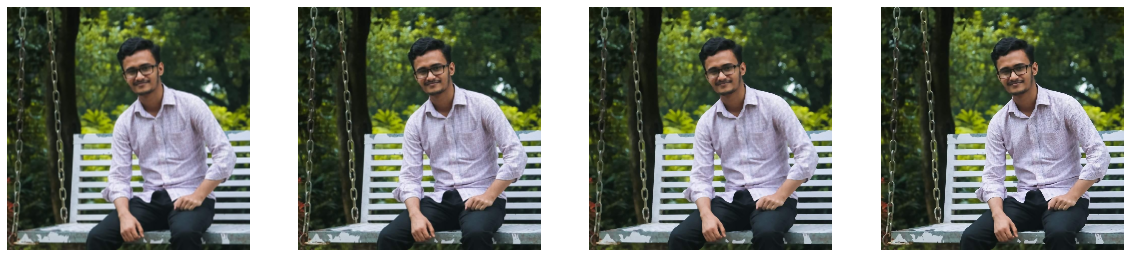

In [32]:
import cv2
import matplotlib.pyplot as plt

img_x = cv2.imread('mazhar.jpg')
img = cv2.cvtColor(img_x, cv2.COLOR_BGR2RGB)

img_0 = cv2.blur(img, ksize=(7,7))
img_1 = cv2.GaussianBlur(img, ksize=(7,7), sigmaX= 0)
img_2 = cv2.medianBlur(img, 7)
img_3 = cv2.bilateralFilter(img, 7, sigmaSpace = 75, sigmaColor = 75)

images = [img_0, img_1, img_2, img_3]
fig, axs = plt.subplots(nrows = 1, ncols = 4, figsize = (20,20))

for ind, s in enumerate(images):
    ax= axs[ind]
    ax.imshow(s)
    ax.axis("off")

plt.show()


### Thresholding 

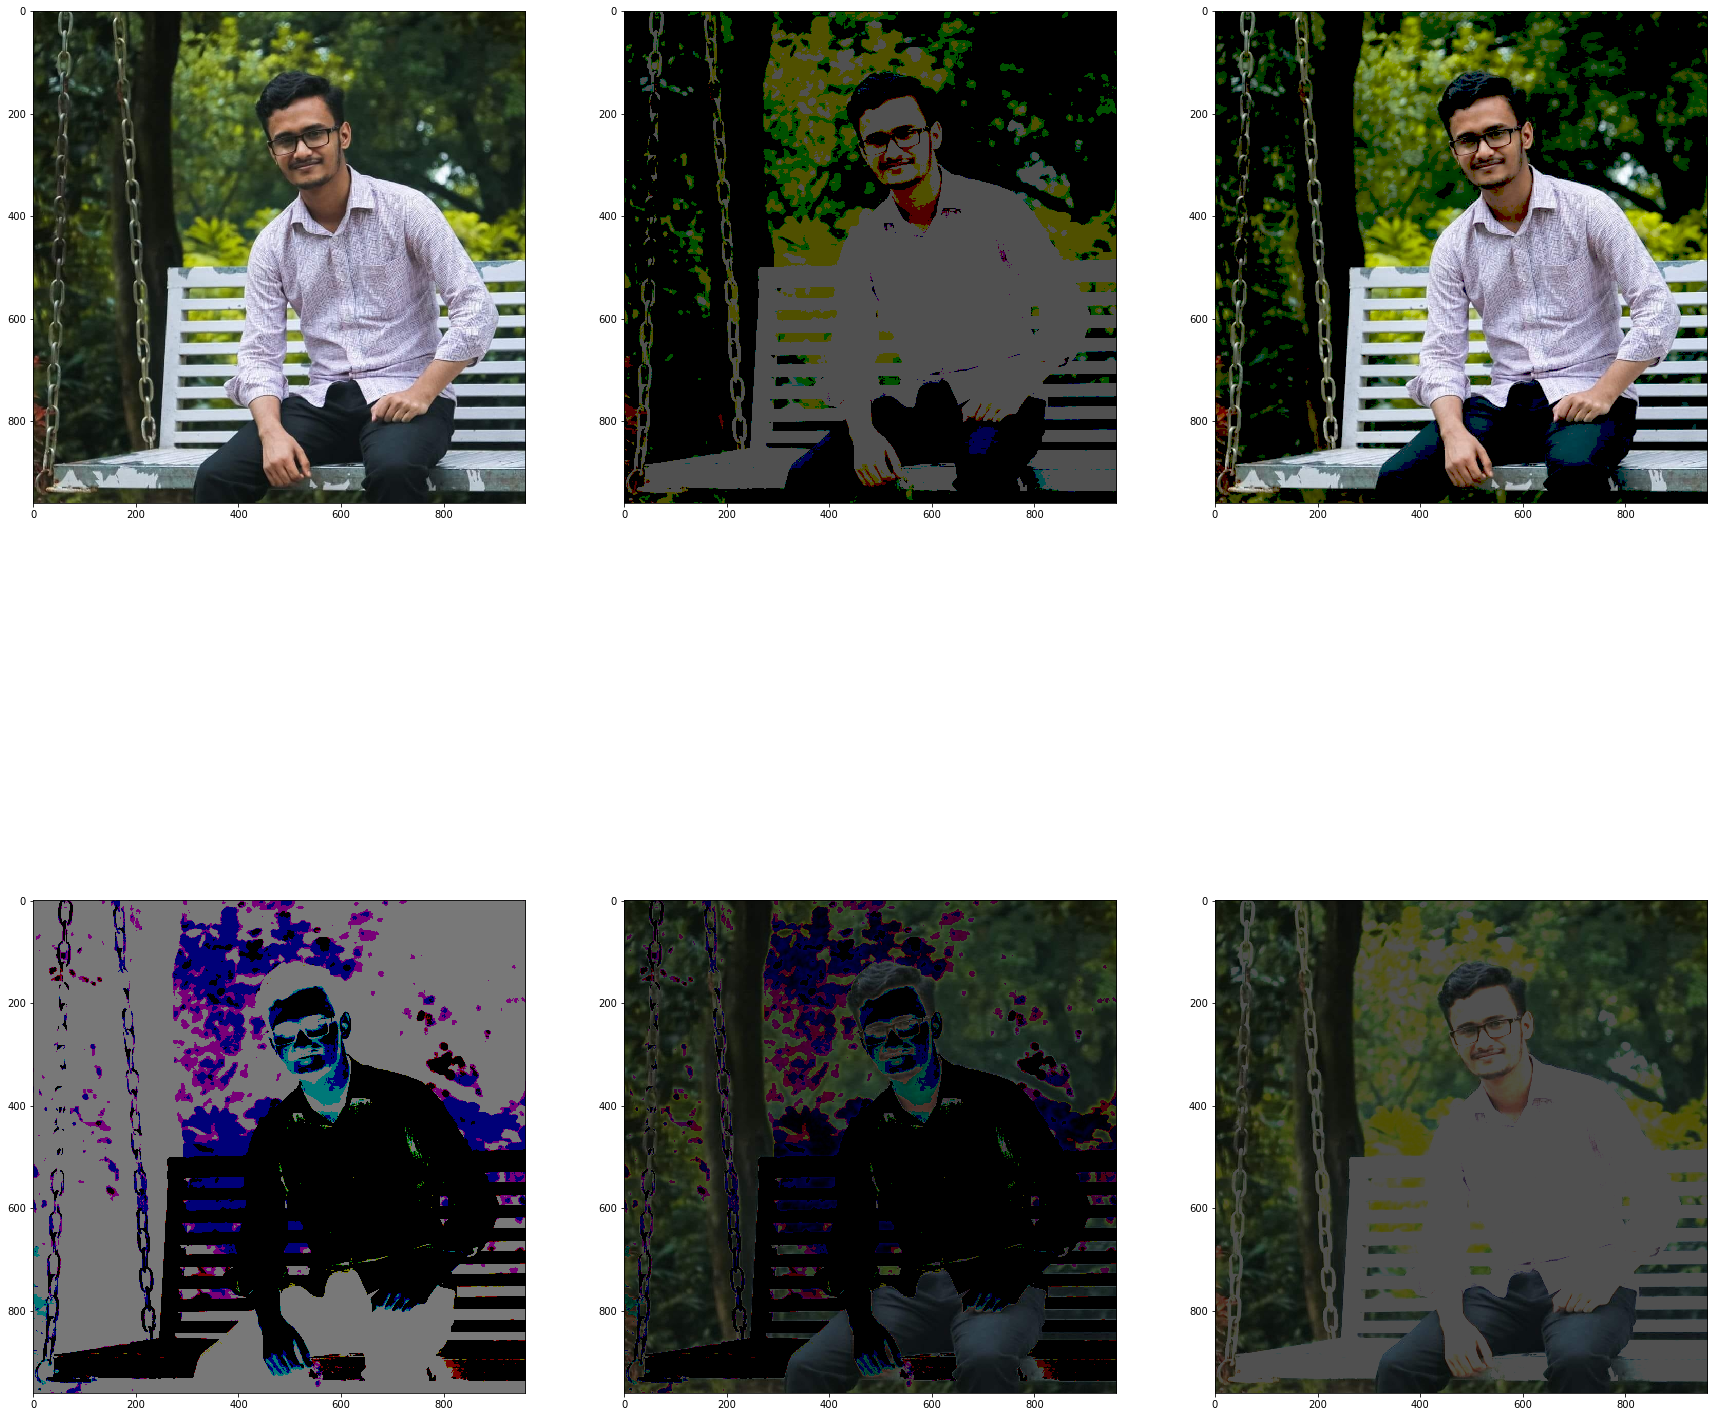

In [34]:
import cv2
import matplotlib.pyplot as plt 

img_inp = cv2.imread("mazhar.jpg")
img = cv2.cvtColor(img_inp, cv2.COLOR_BGR2RGB)
#plt.imshow(img)

#lets try thresholding 
_, th_0 = cv2.threshold(img, 70, 80, cv2.THRESH_BINARY)
_, th_1 = cv2.threshold(img, 50, 140, cv2.THRESH_TOZERO)
_, th_2 = cv2.threshold(img, 80, 120, cv2.THRESH_BINARY_INV)
_, th_3 = cv2.threshold(img, 80, 120, cv2.THRESH_TOZERO_INV)
_, th_4 = cv2.threshold(img, 80, 120, cv2.THRESH_TRUNC)

imgs = [img, th_0, th_1, th_2, th_3, th_4]

fig, axs = plt.subplots(nrows = 2, ncols = 3, figsize = (30,30))
for ind, p in enumerate(imgs):
    ax = axs[ind//3, ind%3]
    ax.imshow(p)
plt.show()

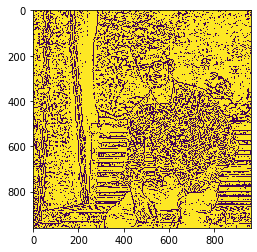

In [41]:
img = cv2.cvtColor(img_inp, cv2.COLOR_BGR2GRAY)
ad_1 = cv2.adaptiveThreshold(img, 120, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 7, 2)
plt.imshow(ad_1)






